In [49]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.pyplot
import seaborn as sns
import os
import gc
gc.collect()

2123997

In [2]:
os.chdir("/Users/dsg281/Downloads/Grab_safety/safety/safety/Meged_Data/")

In [3]:
safety = pd.read_excel("Train_data.xlsx",nrows=10000)

In [4]:
## Data Size

In [5]:
safety.shape

(10000, 12)

In [6]:
## Check NULL Values 

In [7]:
safety.isna().sum()

bookingID         0
Accuracy          0
Bearing           0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
second            0
Speed             0
label             0
dtype: int64

In [8]:
## Additinal Info

In [9]:
safety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
bookingID         10000 non-null int64
Accuracy          10000 non-null float64
Bearing           10000 non-null float64
acceleration_x    10000 non-null float64
acceleration_y    10000 non-null float64
acceleration_z    10000 non-null float64
gyro_x            10000 non-null float64
gyro_y            10000 non-null float64
gyro_z            10000 non-null float64
second            10000 non-null int64
Speed             10000 non-null float64
label             10000 non-null int64
dtypes: float64(9), int64(3)
memory usage: 937.6 KB


In [10]:
## Columns Names

In [11]:
safety.columns

Index(['bookingID', 'Accuracy', 'Bearing', 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z', 'second', 'Speed',
       'label'],
      dtype='object')

In [12]:
safety.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
0,1194000908341,4.000,203.0,1.001973,9.745000,-0.790087,-0.066046,0.019175,0.044741,246,6.48,1
1,1194000908341,6.836,0.0,0.307056,9.586384,-0.613514,-0.007457,-0.003196,-0.007457,52,0.00,1
2,1194000908341,3.000,0.0,0.171185,9.595362,-0.685939,-0.007457,-0.001065,-0.005326,1048,0.00,1
3,1194000908341,4.000,72.0,-0.128688,9.509171,-1.723825,0.015979,0.006392,-0.028762,422,5.48,1
4,1194000908341,3.900,203.0,0.466869,8.410830,-0.347758,-0.045806,-0.073503,0.040480,237,10.02,1


In [13]:
safety.describe()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8.689681e+11,7.624645,148.475450,-0.452325,3.100441,0.548946,-0.007366,0.000011,-0.000241,673.083600,10.685433,0.173900
std,3.067145e+11,29.709520,102.889922,1.697071,8.416831,3.520682,0.137380,0.184109,0.101338,444.924053,9.275788,0.379042
min,8.589935e+09,3.000000,0.000000,-9.050359,-13.507599,-9.603436,-3.232473,-8.063148,-2.515148,0.000000,-1.000000,0.000000
25%,7.387344e+11,3.900000,67.000000,-0.827663,-8.382622,-1.953129,-0.029438,-0.024162,-0.013055,304.000000,1.717693,0.000000
50%,9.620727e+11,6.000000,151.163849,-0.047029,8.846488,0.937675,-0.005326,-0.000949,0.000387,603.000000,9.235000,0.000000
75%,1.142461e+12,10.000000,227.000000,0.397123,9.543208,2.786936,0.011223,0.022044,0.017872,993.000000,18.770000,0.000000
max,1.194001e+12,2000.000000,359.053833,6.033573,17.578228,12.158128,3.043556,6.148632,2.071839,1764.000000,34.095720,1.000000


In [14]:
## Lets See the target Variable

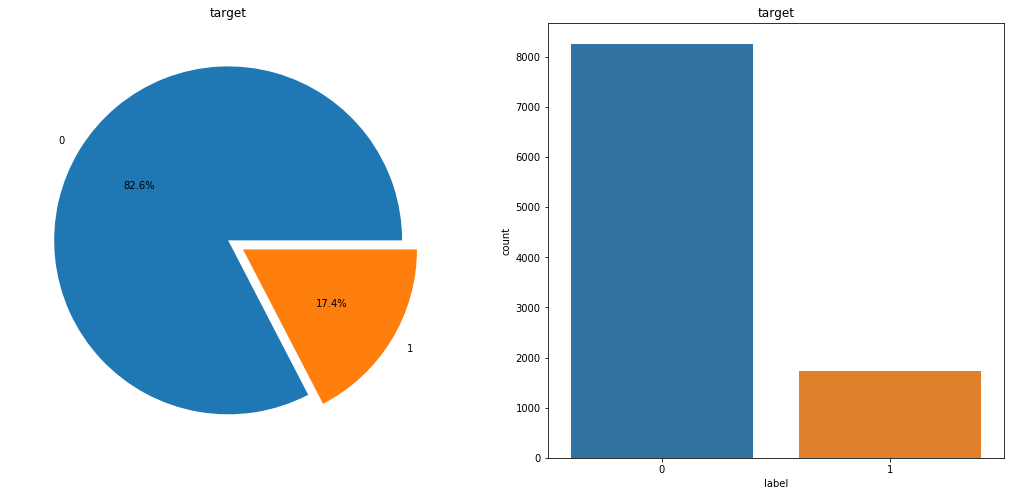

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
safety['label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('label',data=safety,ax=ax[1])
ax[1].set_title('target')
plt.show()

## Target Values

In [17]:
safety['label'].value_counts()

0    8261
1    1739
Name: label, dtype: int64

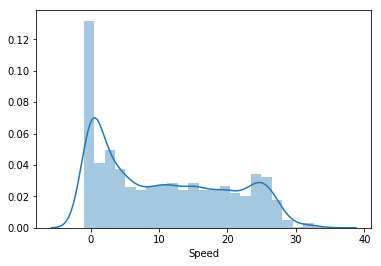

In [19]:
sns.distplot(safety['Speed'])

In [20]:
## Converting data into mean
##Mean is used to derive the central tendency of the data

In [21]:
safety_mean = safety.groupby("bookingID").mean()

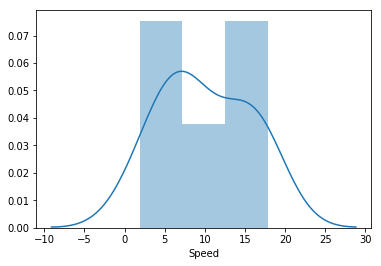

In [22]:
sns.distplot(safety_mean['Speed'])

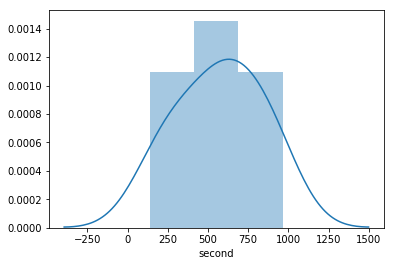

In [23]:
sns.distplot(safety_mean['second'])

### OK lets get Additinal Features and Copy Data 

In [24]:
safety_2 = safety.copy()

In [25]:
safety_2['Distance'] = safety_2['Speed'] * safety_2['second']

In [26]:
safety_2['Acceleration'] = np.sqrt(np.power(safety_2['acceleration_x'], 2) + np.power(safety_2['acceleration_y'], 2) + np.power(safety_2['acceleration_z'], 2))

In [27]:
# Acceleration and Pitch simliar 
safety_2["Pitch"] = 180*np.arctan2(safety_2["acceleration_y"], np.sqrt(safety_2["acceleration_x"]**2+safety_2["acceleration_z"]**2))/np.pi

In [28]:
safety_2['Magnitude'] = np.sqrt(np.power(safety_2['gyro_x'], 2) + np.power(safety_2['gyro_y'], 2) + np.power(safety_2['gyro_z'], 2))

In [29]:
safety_2['Bearing_diff'] = safety_2.groupby(['bookingID'])['Bearing'].transform(lambda x: x.diff())
## Deal NAN - used backward fill
safety_2['Bearing_diff'] = safety_2['Bearing_diff'].fillna(method='backfill')

In [30]:
safety.isna().sum()

bookingID         0
Accuracy          0
Bearing           0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
second            0
Speed             0
label             0
dtype: int64

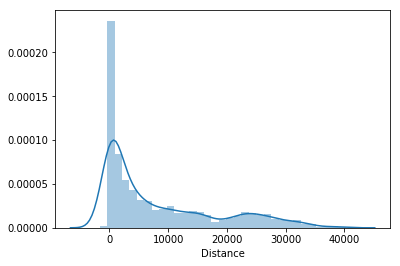

In [32]:
sns.distplot(safety_2['Distance'])

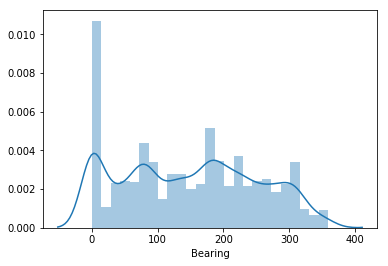

In [33]:
sns.distplot(safety_2['Bearing'])

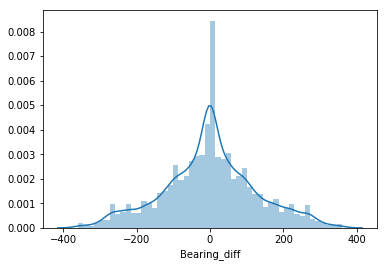

In [34]:
sns.distplot(safety_2['Bearing_diff'])

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


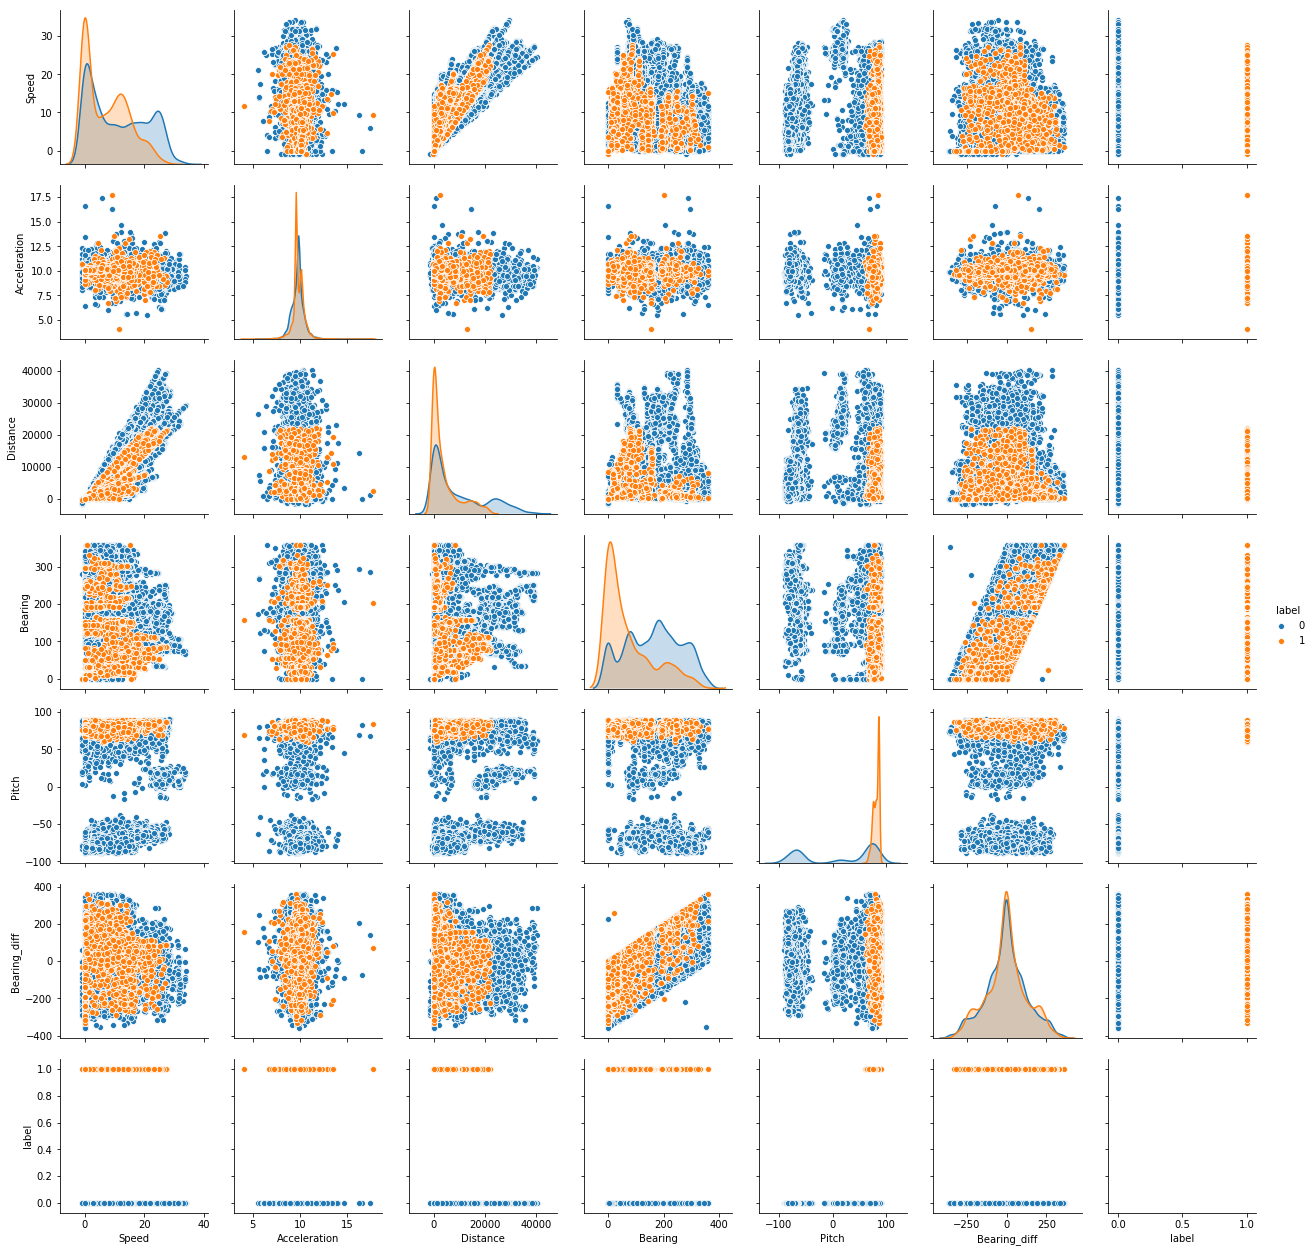

In [35]:
# compare with speed #relationship between variables
Speed_Pairplot = sns.pairplot(safety_2[['Speed','Acceleration','Distance','Bearing','Pitch','Bearing_diff','label']], hue="label")


In [36]:
gc.collect()

1048694

In [36]:
#Pearsons Correclation coefficient is a value ranging from -1 to 1 that is a measure of the direction and strength of the linear relationship
safety_2.corr(method='pearson')

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label,Distance,Acceleration,Pitch,Magnitude,Bearing_diff
bookingID,1.000000,0.008130,0.040144,0.301040,-0.093257,-0.422721,-0.016271,0.009663,0.001598,0.090178,0.079376,-0.063404,0.077274,-0.118306,-0.045717,-0.058880,-0.001699
Accuracy,0.008130,1.000000,0.001411,0.038846,-0.063627,-0.045125,0.001496,-0.006302,0.007502,0.007177,-0.021197,-0.053531,-0.020585,-0.006138,-0.063007,0.000918,-0.004731
Bearing,0.040144,0.001411,1.000000,0.023164,-0.260308,-0.027077,-0.021566,-0.006504,0.011701,-0.085946,0.027166,-0.333838,0.006466,0.053769,-0.283122,0.135914,0.613772
acceleration_x,0.301040,0.038846,0.023164,1.000000,-0.099330,-0.500832,-0.015351,-0.063346,0.053784,-0.185613,-0.320810,0.105145,-0.355049,-0.065559,-0.064682,0.044773,0.034939
acceleration_y,-0.093257,-0.063627,-0.260308,-0.099330,1.000000,0.652451,0.033216,0.014360,-0.053297,-0.055612,-0.208993,0.358723,-0.110333,-0.014235,0.993544,0.053204,0.008546
acceleration_z,-0.422721,-0.045125,-0.027077,-0.500832,0.652451,1.000000,0.005853,-0.004388,-0.036529,0.006844,0.007361,-0.035346,0.075931,0.049041,0.598048,0.107587,-0.002898
gyro_x,-0.016271,0.001496,-0.021566,-0.015351,0.033216,0.005853,1.000000,0.245037,-0.042329,-0.000580,0.012774,0.003454,0.008415,-0.021252,0.033319,-0.102719,-0.016657
gyro_y,0.009663,-0.006302,-0.006504,-0.063346,0.014360,-0.004388,0.245037,1.000000,-0.040328,-0.009561,-0.007135,0.001705,-0.009212,-0.019089,0.014233,-0.079161,0.009226
gyro_z,0.001598,0.007502,0.011701,0.053784,-0.053297,-0.036529,-0.042329,-0.040328,1.000000,-0.007010,0.009587,-0.022531,0.003931,-0.023936,-0.051833,-0.041710,0.004341
second,0.090178,0.007177,-0.085946,-0.185613,-0.055612,0.006844,-0.000580,-0.009561,-0.007010,1.000000,0.297032,-0.181459,0.590250,0.027597,-0.058033,-0.071215,-0.090172


In [37]:
#plt.figure(figsize=(20,20)) 
#sns.heatmap(safety_2.corr(method='pearson'),cmap='BuGn')

In [38]:
# Def plot distribution
def plot_distribution(data_select) : 
    figsize =( 30, 25)
    sns.set_style("ticks")
    s = sns.FacetGrid(safety_2, hue = 'label',aspect = 2.5, palette ={0 : 'blue', 1 :'red'})
    s.map(sns.kdeplot, data_select, shade = True, alpha = 0.6)
    s.set(xlim=(safety_2[data_select].min(), safety_2[data_select].max()))
    s.add_legend()
    s.set_axis_labels(data_select, 'feature proportion')
    s.fig.suptitle(data_select)
    plt.show()


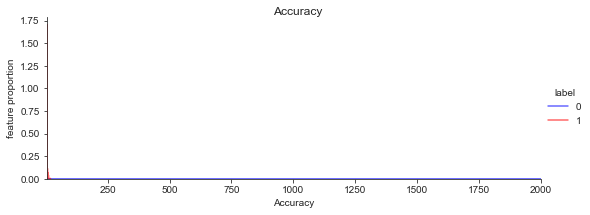

In [39]:
plot_distribution('Accuracy')

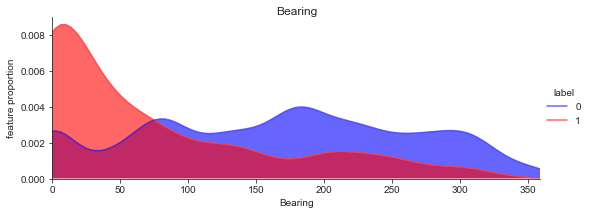

In [40]:
plot_distribution('Bearing')

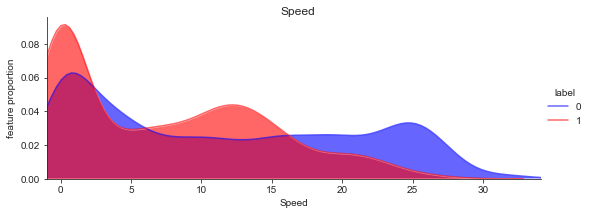

In [41]:
plot_distribution('Speed')

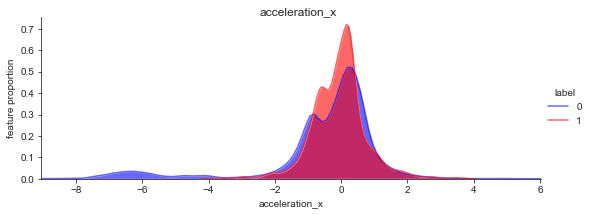

In [42]:
plot_distribution('acceleration_x')

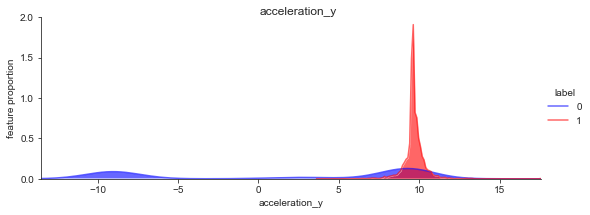

In [43]:
plot_distribution('acceleration_y')

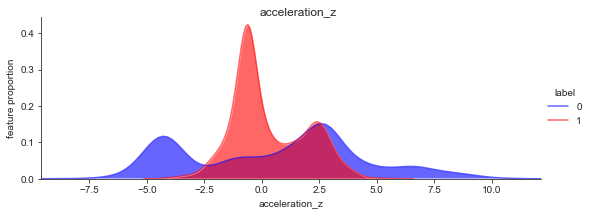

In [44]:
plot_distribution('acceleration_z')

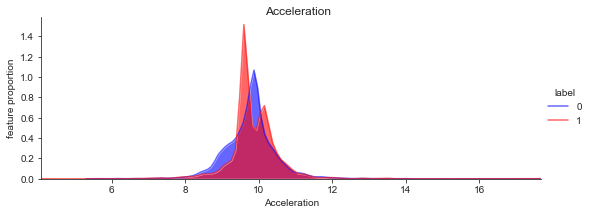

In [45]:
plot_distribution('Acceleration')

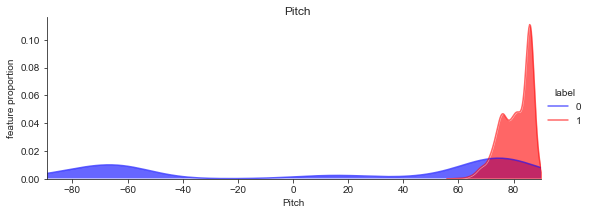

In [46]:
plot_distribution('Pitch')

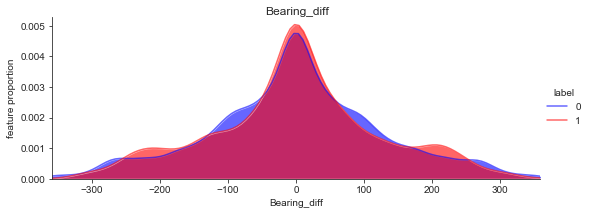

In [47]:
plot_distribution('Bearing_diff')

In [48]:
safety_2.columns

Index(['bookingID', 'Accuracy', 'Bearing', 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z', 'second', 'Speed',
       'label', 'Distance', 'Acceleration', 'Pitch', 'Magnitude',
       'Bearing_diff'],
      dtype='object')

In [48]:
#safety_2.sort_values(by='label').plot(kind='bar', stacked=True, figsize=(30,10), fontsize=20).legend(prop={'size': 20})

In [74]:
### Lets Do the modeling 